In [ ]:
## TODO
## subclass nx.graph and store adj, D, etc as attribute variables
## Grabriel quality

In [2]:
## custom
from utils import utils, vis
from utils import poly_point_isect as bo   ##bentley-ottmann sweep line
import criteria as C
import quality as Q
import gd2


## third party
import networkx as nx

from PIL import Image
from natsort import natsorted


## sys
import random
import time
from glob import glob
import math
from collections import defaultdict
import os
from pathlib import Path
import itertools


## numeric
import numpy as np
import scipy.io as io
import torch
from torch import nn, optim
import torch.nn.functional as F


## vis
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits import mplot3d
from matplotlib import collections  as mc
from mpl_toolkits.mplot3d.art3d import Line3DCollection

## notebook
from IPython import display
from IPython.display import clear_output
from tqdm.notebook import tqdm

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device = 'cpu'
plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')


## Optimize via Stochastic Gradient Descent (SGD)

In [3]:
# delete old
# !rm -r figures
# !mkdir figures

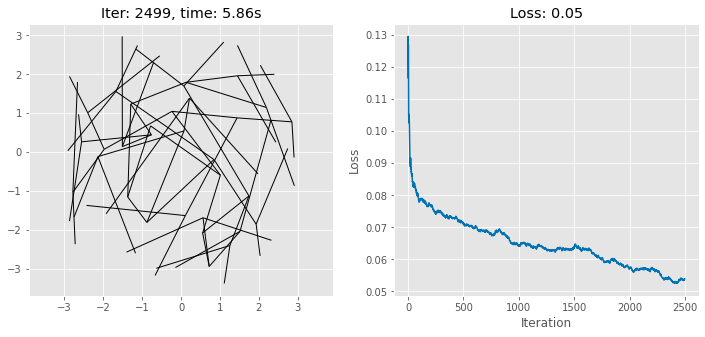

KeyboardInterrupt: 

In [4]:
%%time


import importlib
importlib.reload(C)
importlib.reload(Q)
importlib.reload(utils)
importlib.reload(vis)
import gd2
importlib.reload(gd2)
from gd2 import GD2


##choose a graph
G = nx.balanced_tree(2,5)
# G = nx.grid_2d_graph(6,15)
# G = nx.hypercube_graph(4)
# G = utils.load_spx_teaser()
# G = nx.karate_club_graph()

# graph_name = 'grid1'
# graph_name = 'grid1_dual'
# graph_name = 'odepa400'
# graph_name = 'netz4504_dual'
# graph_name = 'L'
# -----
# graph_name = 'netz4504'
# graph_name = 'qh882'
# mat_dir = 'graphs/SuiteSparse Matrix Collection'
# G = utils.load_mat(f'{mat_dir}/{graph_name}.mat')


# G = nx.Graph()
# G.add_nodes_from([0,1,2,3])
# G.add_edges_from([(0,1),(2,3)])




## choose criteria
criteria_pair = {'stress', 'aspect_ratio'}



criteria_weights = dict(
    stress=0.1,
    edge_uniformity=0.01,
    neighborhood_preservation=0.5,
    crossings=0.9,
    crossing_angle_maximization=0.1,
    aspect_ratio=0.9,
    angular_resolution=0.1,
    vertex_resolution=0.99,
    gabriel=0.5,
)

sample_sizes = dict(
    stress=64,
    edge_uniformity=int(len(G)**0.5),
    neighborhood_preservation=16,
    crossings=16,
    crossing_angle_maximization=10,
    aspect_ratio=int(len(G)**0.5),
    angular_resolution=32,
    vertex_resolution=int(len(G)**0.5),
    gabriel=10,
)

gd = GD2(G)

result = gd.optimize(
    criteria_weights={c:criteria_weights[c] for c in criteria_pair}, 
    sample_sizes=sample_sizes,
    
#     evaluate='all',
#     evaluate={'stress'},    
#     evaluate={'angular_resolution'},
#     evaluate={'neighborhood_preservation'},
#     evaluate={'crossing_angle_maximization'},
    evaluate=criteria_pair,
    
    max_iter=10000, 
    evaluate_interval=10000//40,
    vis_interval=10000//20,
    clear_output=True,
    
    optimizer_kwargs = dict(lr=1),
    scheduler_kwargs = dict(verbose=True),
)

pos = gd.pos.detach().numpy()
pos_G = {k:pos[gd.k2i[k]] for k in gd.G.nodes}
vis.plot(
    gd.G, pos_G,
    gd.loss_curve, 
    result['iter'], result['runtime'],
    edge=True, show=True, save=False
)



(0.0, 1.1)

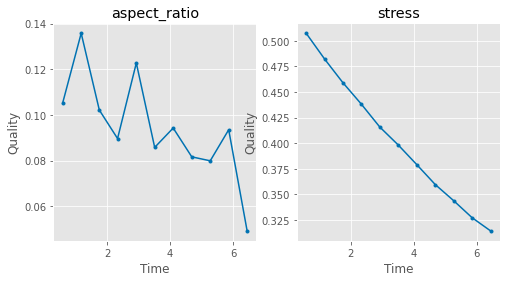

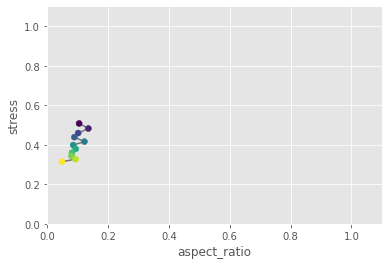

In [7]:
qx, qy = criteria_pair

t = [r['time'] for r in gd.qualities_by_time]
quality_curve_x = [r['qualities'][qx] for r in gd.qualities_by_time]
quality_curve_y = [r['qualities'][qy] for r in gd.qualities_by_time]

plt.figure(figsize=[8,4])
plt.subplot(121)
plt.plot(t, quality_curve_x, '.-')
plt.title(qx)
plt.xlabel('Time')
plt.ylabel('Quality')

plt.subplot(122)
plt.plot(t, quality_curve_y, '.-')
plt.title(qy)
plt.xlabel('Time')
plt.ylabel('Quality')

plt.figure()
plt.plot(quality_curve_x, quality_curve_y, '-', c='#777777', zorder=-1)
plt.scatter(quality_curve_x, quality_curve_y, c=np.arange(len(quality_curve_x)))
plt.xlabel(qx)
plt.ylabel(qy)
plt.xlim([0, max(max(quality_curve_x), 1.1)])
plt.ylim([0, max(max(quality_curve_y)*1.05, 1.1)])


## Example matrix

In [ ]:
# !mkdir -p ./analysis/pairs

In [8]:
# ##DONE move it to GD2.py

# import pickle as pkl

# def dump(gd, fn='result.pkl'):
#     with open(fn, 'wb') as f:
#         pkl.dump(dict(
#             G=gd.G,
#             pos=gd.pos,
#             i2k=gd.i2k,
#             k2i=gd.k2i,
#             iter=gd.i,
#             runtime=gd.runtime,
#             loss_curve=gd.loss_curve,
#             qualities_by_time = gd.qualities_by_time,
#         ), f)

In [15]:
##choose a graph
# G = nx.balanced_tree(2,5)
# graph_str = 'tree_2_5'

G = nx.grid_2d_graph(5,8)
graph_str = 'grid_5_8'

start_date = int(time.time())
dir_out = f'./analysis/criteria_pairs/{graph_str}-t{start_date}'
print(dir_out)
if not Path(dir_out).exists():
    os.makedirs(dir_out)

./analysis/criteria_pairs/grid_5_8-t1634182400


[('stress', 'stress'),
 ('stress', 'edge_uniformity'),
 ('stress', 'neighborhood_preservation'),
 ('stress', 'crossings'),
 ('stress', 'crossing_angle_maximization'),
 ('stress', 'aspect_ratio'),
 ('stress', 'angular_resolution'),
 ('stress', 'vertex_resolution'),
 ('stress', 'gabriel'),
 ('edge_uniformity', 'edge_uniformity'),
 ('edge_uniformity', 'neighborhood_preservation'),
 ('edge_uniformity', 'crossings'),
 ('edge_uniformity', 'crossing_angle_maximization'),
 ('edge_uniformity', 'aspect_ratio'),
 ('edge_uniformity', 'angular_resolution'),
 ('edge_uniformity', 'vertex_resolution'),
 ('edge_uniformity', 'gabriel'),
 ('neighborhood_preservation', 'neighborhood_preservation'),
 ('neighborhood_preservation', 'crossings'),
 ('neighborhood_preservation', 'crossing_angle_maximization'),
 ('neighborhood_preservation', 'aspect_ratio'),
 ('neighborhood_preservation', 'angular_resolution'),
 ('neighborhood_preservation', 'vertex_resolution'),
 ('neighborhood_preservation', 'gabriel'),
 ('cro

{'stress'}



{'stress': 0.2692951999069161, 'edge_uniformity': 0.3587779402732849, 'neighborhood_preservation': 0.8347826153039932, 'crossings': 111, 'crossing_angle_maximization': 0.8877986889479571, 'aspect_ratio': 0.21456235647201538, 'angular_resolution': 0.9738317243754864, 'vertex_resolution': 0.8759308455128542, 'gabriel': 0.8887030184268951}


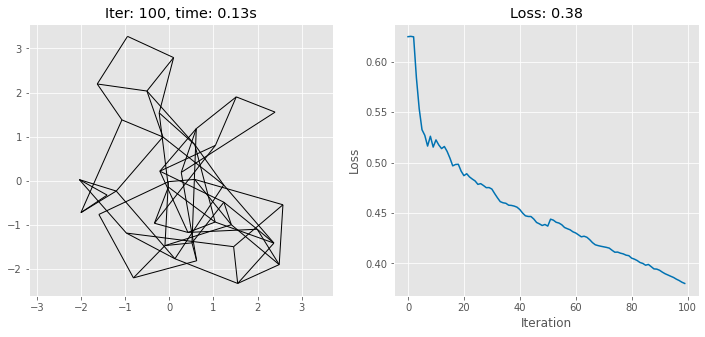

{'edge_uniformity', 'stress'}



{'stress': 0.2012254723588886, 'edge_uniformity': 0.11084866523742676, 'neighborhood_preservation': 0.7649769634008408, 'crossings': 56, 'crossing_angle_maximization': 0.8949637850602727, 'aspect_ratio': 0.12367433309555054, 'angular_resolution': 0.9918100535869598, 'vertex_resolution': 0.807303466313594, 'gabriel': 0.8908595591783524}


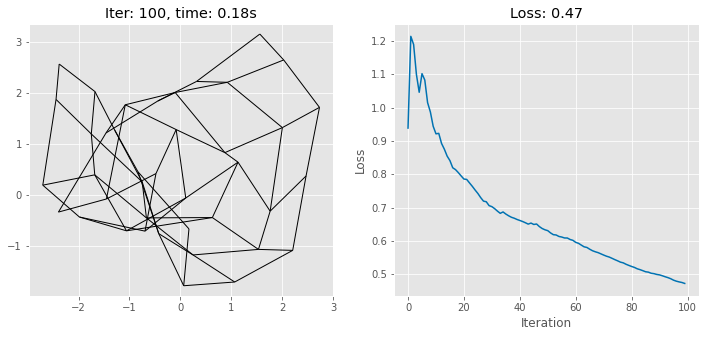

{'neighborhood_preservation', 'stress'}



{'stress': 0.10312577714693967, 'edge_uniformity': 0.20323102176189423, 'neighborhood_preservation': 0.3855421543121338, 'crossings': 20, 'crossing_angle_maximization': 0.7904247041735964, 'aspect_ratio': 0.31945812702178955, 'angular_resolution': 0.8883712589740753, 'vertex_resolution': 0.7695369226458759, 'gabriel': 0.9682213813066483}


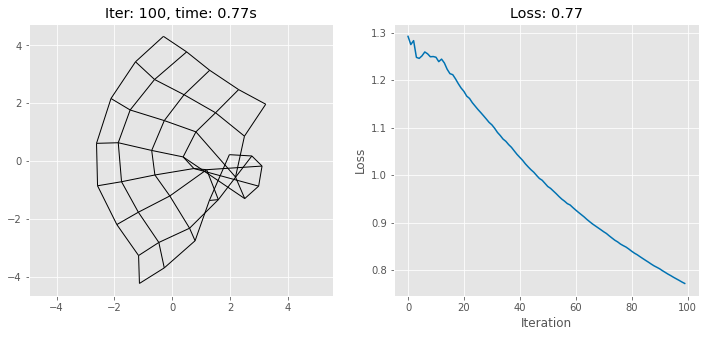

{'crossings', 'stress'}



{'stress': 0.17410075720637427, 'edge_uniformity': 0.3589493930339813, 'neighborhood_preservation': 0.7358490526676178, 'crossings': 39, 'crossing_angle_maximization': 0.7962647435869298, 'aspect_ratio': 0.3974030613899231, 'angular_resolution': 0.9615985527634621, 'vertex_resolution': 0.8790090176135819, 'gabriel': 0.968949856236577}


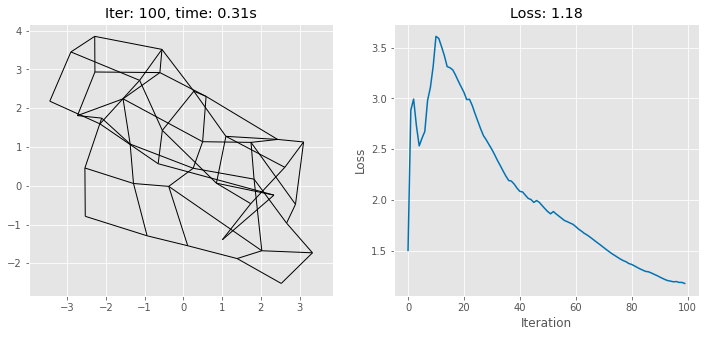

{'crossing_angle_maximization', 'stress'}



{'stress': 0.22522903886716872, 'edge_uniformity': 0.4958125948905945, 'neighborhood_preservation': 0.8347826153039932, 'crossings': 86, 'crossing_angle_maximization': 0.8319294870300407, 'aspect_ratio': 0.3406292200088501, 'angular_resolution': 0.9848870681598783, 'vertex_resolution': 0.8944025709927605, 'gabriel': 0.9754246640950441}


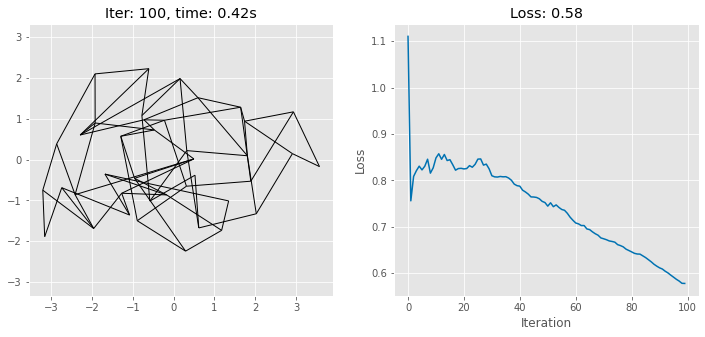

{'aspect_ratio', 'stress'}



{'stress': 0.292065001794197, 'edge_uniformity': 1.442094087600708, 'neighborhood_preservation': 0.8448275923728943, 'crossings': 78, 'crossing_angle_maximization': 0.8232227413310623, 'aspect_ratio': 0.11423999071121216, 'angular_resolution': 0.9992081534001045, 'vertex_resolution': 0.9657116543681099, 'gabriel': 0.8761733919382095}


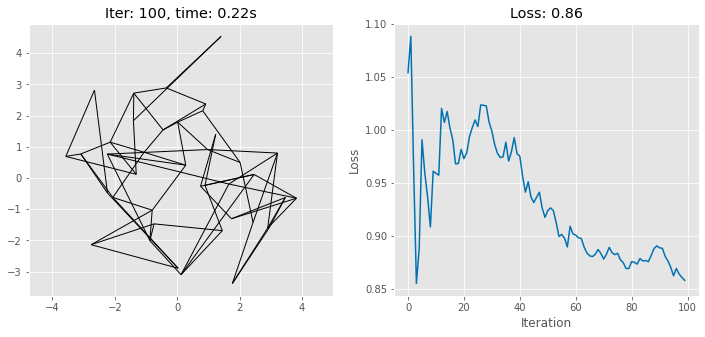

{'angular_resolution', 'stress'}



{'stress': 0.2143199799352174, 'edge_uniformity': 0.20412595570087433, 'neighborhood_preservation': 0.7649769634008408, 'crossings': 66, 'crossing_angle_maximization': 0.9128686706235165, 'aspect_ratio': 0.09671849012374878, 'angular_resolution': 0.8584671318531036, 'vertex_resolution': 0.8132942802087839, 'gabriel': 0.9057637304067612}


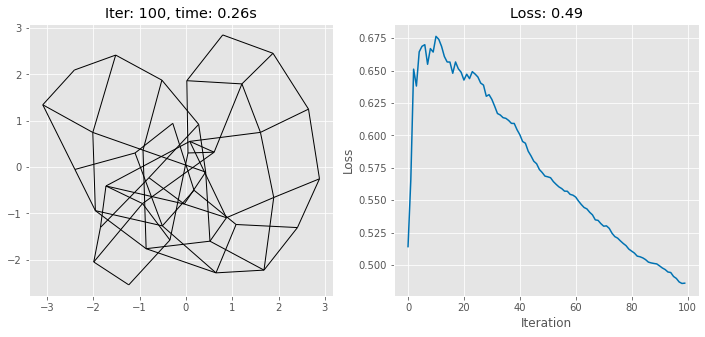

{'vertex_resolution', 'stress'}



{'stress': 0.19529236941677872, 'edge_uniformity': 0.23758649826049805, 'neighborhood_preservation': 0.7706422060728073, 'crossings': 66, 'crossing_angle_maximization': 0.8373365683409859, 'aspect_ratio': 0.059154391288757324, 'angular_resolution': 0.9550010077655315, 'vertex_resolution': 0.7554879281560883, 'gabriel': 0.9277019947767258}


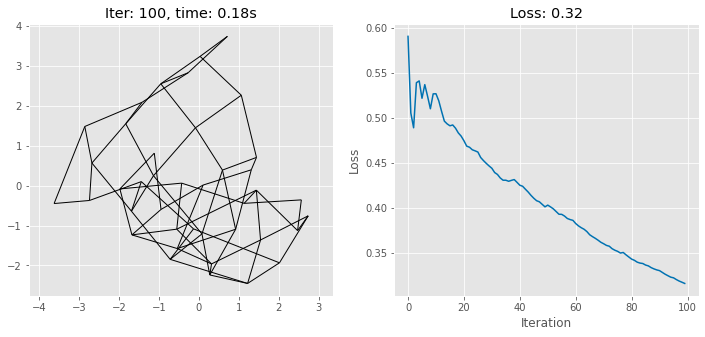

{'gabriel', 'stress'}



{'stress': 0.2368036680797484, 'edge_uniformity': 0.24670644104480743, 'neighborhood_preservation': 0.8644067794084549, 'crossings': 95, 'crossing_angle_maximization': 0.9211129366246943, 'aspect_ratio': 0.32087355852127075, 'angular_resolution': 0.9975742204114795, 'vertex_resolution': 0.9222439289592393, 'gabriel': 0.8924150243401527}


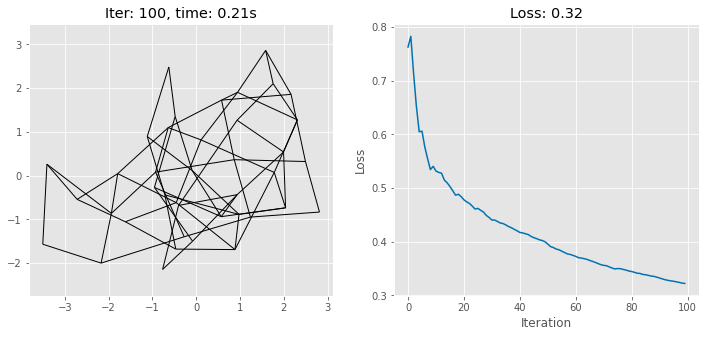

{'edge_uniformity'}



{'stress': 0.5202014534692055, 'edge_uniformity': 0.11896275728940964, 'neighborhood_preservation': 0.9924812028184533, 'crossings': 482, 'crossing_angle_maximization': 0.9635951195513672, 'aspect_ratio': 0.15014106035232544, 'angular_resolution': 0.9995900368667208, 'vertex_resolution': 0.9461578537325975, 'gabriel': 0.954069796949625}


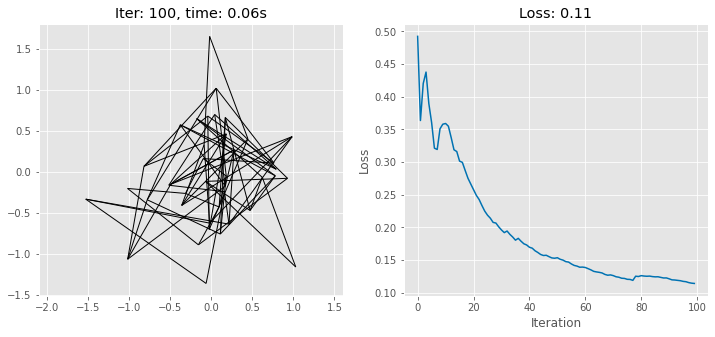

{'edge_uniformity', 'neighborhood_preservation'}



{'stress': 0.1542329663215916, 'edge_uniformity': 0.24601013958454132, 'neighborhood_preservation': 0.47727274894714355, 'crossings': 34, 'crossing_angle_maximization': 0.7052929986855853, 'aspect_ratio': 0.15289783477783203, 'angular_resolution': 0.9621077962219715, 'vertex_resolution': 0.6741421612346278, 'gabriel': 0.9384548701345921}


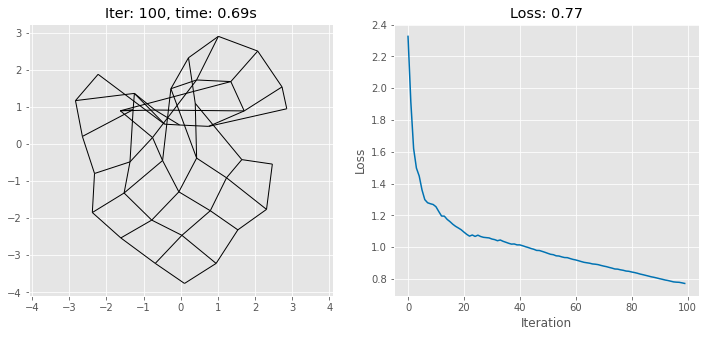

{'edge_uniformity', 'crossings'}



{'stress': 0.4072104177851277, 'edge_uniformity': 1.847412347793579, 'neighborhood_preservation': 0.8691983073949814, 'crossings': 189, 'crossing_angle_maximization': 0.9685571760923907, 'aspect_ratio': 0.495760977268219, 'angular_resolution': 0.9928524349816144, 'vertex_resolution': 0.9499975238009207, 'gabriel': 0.9164781421422958}


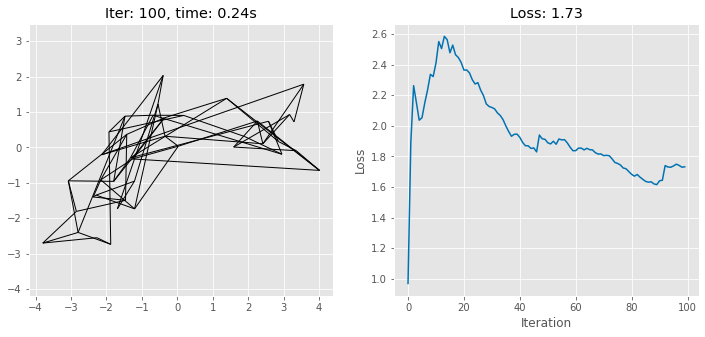

{'edge_uniformity', 'crossing_angle_maximization'}



{'stress': 0.48532342318304633, 'edge_uniformity': 0.3369210660457611, 'neighborhood_preservation': 0.9731800761073828, 'crossings': 453, 'crossing_angle_maximization': 0.9339941421624028, 'aspect_ratio': 0.25501835346221924, 'angular_resolution': 0.9962778885383159, 'vertex_resolution': 0.8711991744779023, 'gabriel': 0.9746647346764803}


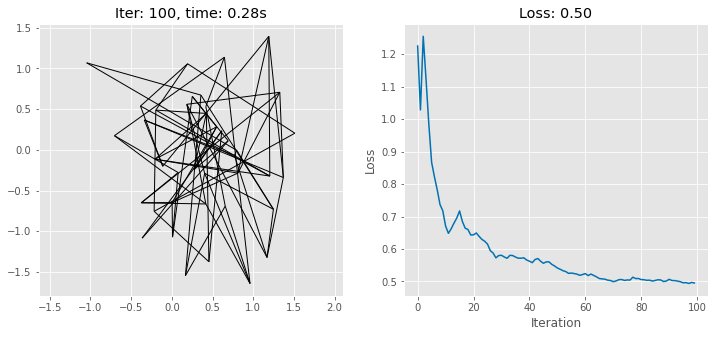

{'edge_uniformity', 'aspect_ratio'}



{'stress': 0.4426733886049736, 'edge_uniformity': 1.6473783254623413, 'neighborhood_preservation': 0.9193548411130905, 'crossings': 273, 'crossing_angle_maximization': 0.9823260785492286, 'aspect_ratio': 0.22328788042068481, 'angular_resolution': 0.9939269754104316, 'vertex_resolution': 0.8381760745736286, 'gabriel': 0.9428653679788113}


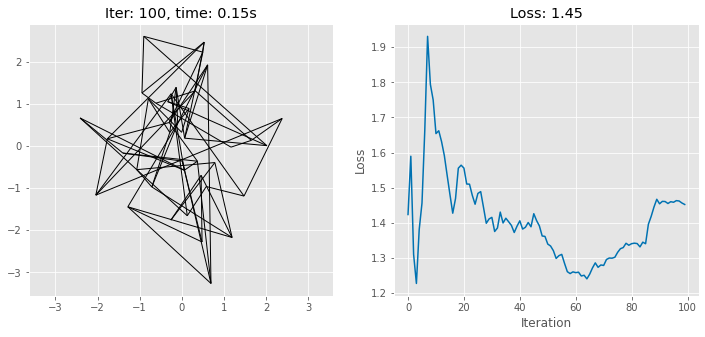

{'edge_uniformity', 'angular_resolution'}



{'stress': 0.46111319298010556, 'edge_uniformity': 0.08754432946443558, 'neighborhood_preservation': 0.9652509652078152, 'crossings': 265, 'crossing_angle_maximization': 0.9583654713768608, 'aspect_ratio': 0.22983288764953613, 'angular_resolution': 0.9763330910354853, 'vertex_resolution': 0.9659064250706252, 'gabriel': 0.9630383029580116}


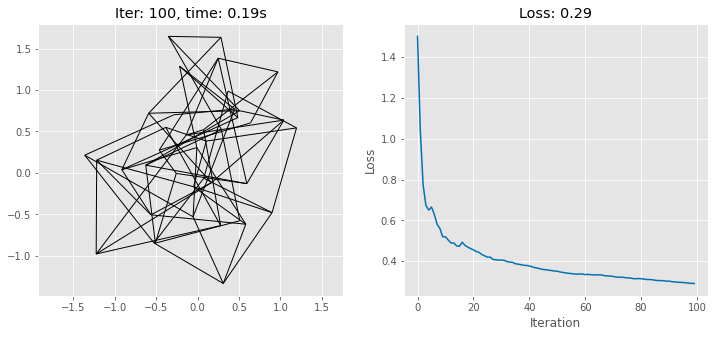

{'edge_uniformity', 'vertex_resolution'}



{'stress': 0.5144007311340066, 'edge_uniformity': 0.08430906385183334, 'neighborhood_preservation': 0.9848484843969345, 'crossings': 354, 'crossing_angle_maximization': 0.9379604330134292, 'aspect_ratio': 0.18134790658950806, 'angular_resolution': 0.9969027370680124, 'vertex_resolution': 0.9195021570725876, 'gabriel': 0.9357893168926239}


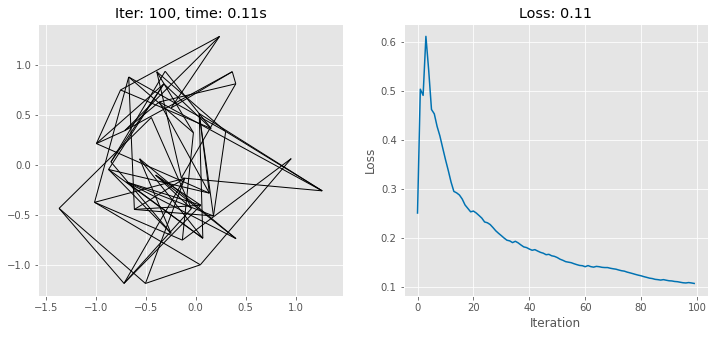

{'edge_uniformity', 'gabriel'}



{'stress': 0.48664879082944923, 'edge_uniformity': 0.048759687691926956, 'neighborhood_preservation': 0.9924812028184533, 'crossings': 300, 'crossing_angle_maximization': 0.9723269851682931, 'aspect_ratio': 0.0888778567314148, 'angular_resolution': 0.9987885521259159, 'vertex_resolution': 0.8912771404077837, 'gabriel': 0.9367607906460762}


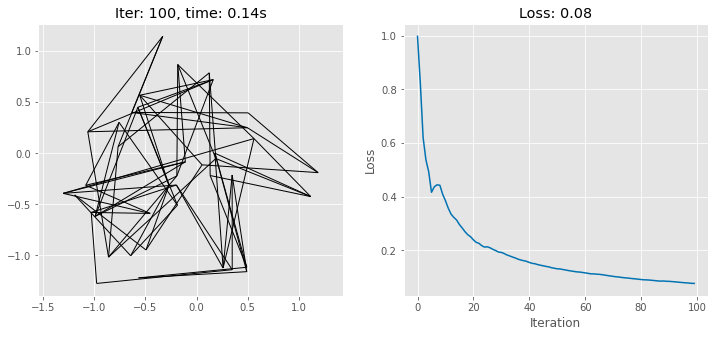

{'neighborhood_preservation'}



{'stress': 0.30745922311169444, 'edge_uniformity': 0.5788729190826416, 'neighborhood_preservation': 0.8141592890024185, 'crossings': 158, 'crossing_angle_maximization': 0.939741291003024, 'aspect_ratio': 0.2558239698410034, 'angular_resolution': 0.9870784850791097, 'vertex_resolution': 0.9349035466979263, 'gabriel': 0.971257645636797}


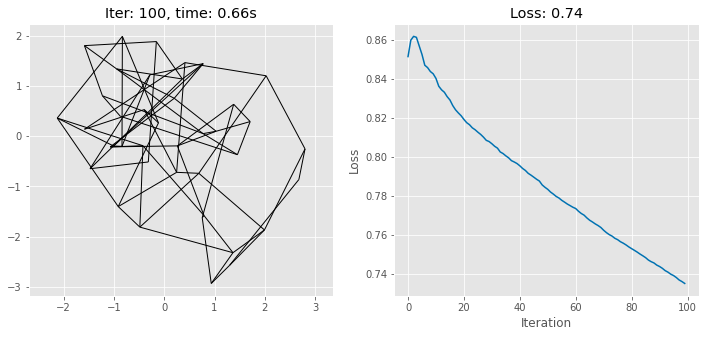

{'neighborhood_preservation', 'crossings'}



{'stress': 0.3152448850072344, 'edge_uniformity': 1.2513200044631958, 'neighborhood_preservation': 0.6862744987010956, 'crossings': 72, 'crossing_angle_maximization': 0.967130046010812, 'aspect_ratio': 0.4662550687789917, 'angular_resolution': 0.9628836512565613, 'vertex_resolution': 0.8204408497707587, 'gabriel': 0.9177820459008217}


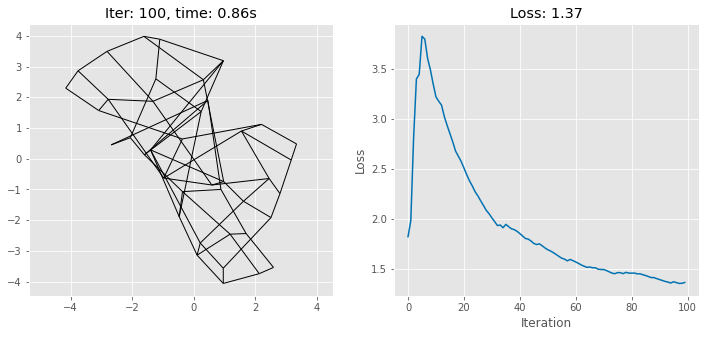

{'neighborhood_preservation', 'crossing_angle_maximization'}



{'stress': 0.2619320544020735, 'edge_uniformity': 0.7032212018966675, 'neighborhood_preservation': 0.7298578321933746, 'crossings': 127, 'crossing_angle_maximization': 0.9595206840384823, 'aspect_ratio': 0.24633467197418213, 'angular_resolution': 0.9991284678690135, 'vertex_resolution': 0.9146410215387699, 'gabriel': 0.9230344444513321}


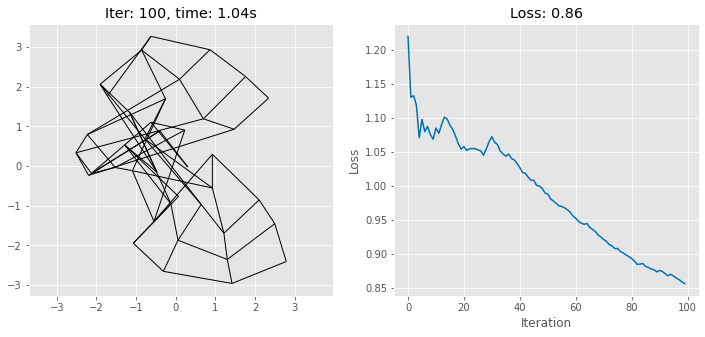

{'neighborhood_preservation', 'aspect_ratio'}



{'stress': 0.4960964276832416, 'edge_uniformity': 2.538717746734619, 'neighborhood_preservation': 0.7592592537403107, 'crossings': 110, 'crossing_angle_maximization': 0.9262746623624545, 'aspect_ratio': 0.15529108047485352, 'angular_resolution': 0.9997070228273515, 'vertex_resolution': 0.8321942825037671, 'gabriel': 0.9498580507934093}


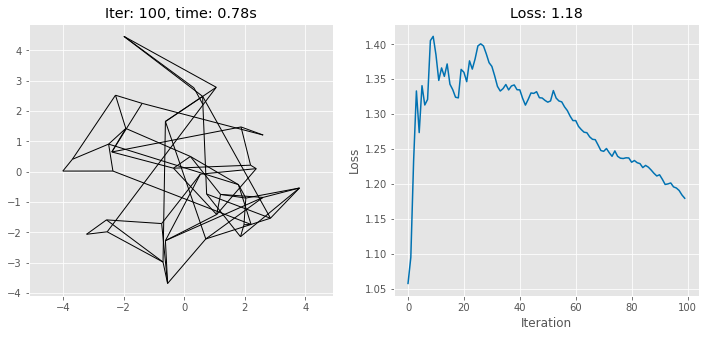

{'neighborhood_preservation', 'angular_resolution'}



{'stress': 0.25501011025616493, 'edge_uniformity': 0.4892275333404541, 'neighborhood_preservation': 0.7476635575294495, 'crossings': 73, 'crossing_angle_maximization': 0.9449361811037541, 'aspect_ratio': 0.12607604265213013, 'angular_resolution': 0.9669341444969177, 'vertex_resolution': 0.7641105637116342, 'gabriel': 0.9284727871417999}


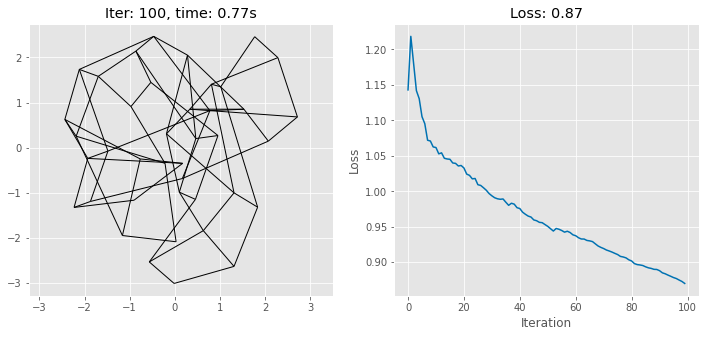

{'neighborhood_preservation', 'vertex_resolution'}



{'stress': 0.24893883389860982, 'edge_uniformity': 0.5131954550743103, 'neighborhood_preservation': 0.7476635575294495, 'crossings': 92, 'crossing_angle_maximization': 0.8359721242177897, 'aspect_ratio': 0.22004324197769165, 'angular_resolution': 0.9030856117606163, 'vertex_resolution': 0.7698748826958888, 'gabriel': 0.9540897682309151}


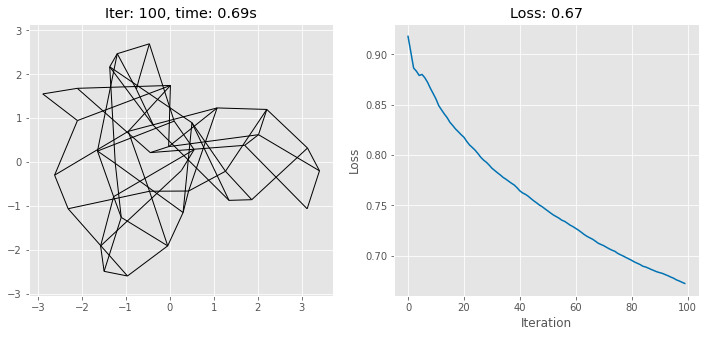

{'neighborhood_preservation', 'gabriel'}



{'stress': 0.24931893836550104, 'edge_uniformity': 0.44737160205841064, 'neighborhood_preservation': 0.7177033424377441, 'crossings': 54, 'crossing_angle_maximization': 0.7856249025708562, 'aspect_ratio': 0.2907578945159912, 'angular_resolution': 0.995094558224082, 'vertex_resolution': 0.7924179347373708, 'gabriel': 0.9285670667886734}


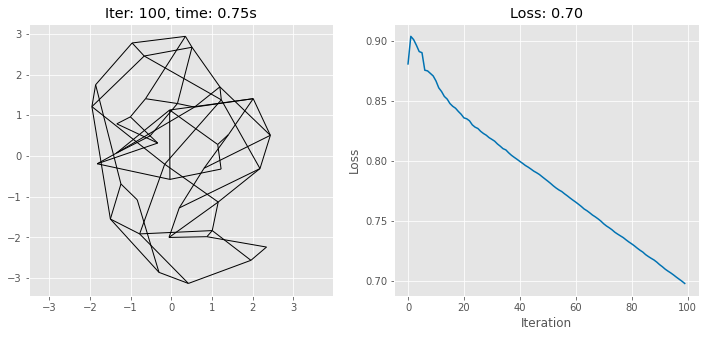

{'crossings'}



{'stress': 0.4035064355820376, 'edge_uniformity': 1.6613298654556274, 'neighborhood_preservation': 0.8739495724439621, 'crossings': 145, 'crossing_angle_maximization': 0.951531184093346, 'aspect_ratio': 0.4821072220802307, 'angular_resolution': 0.9850229136645794, 'vertex_resolution': 0.8685115662493634, 'gabriel': 0.941221971064806}


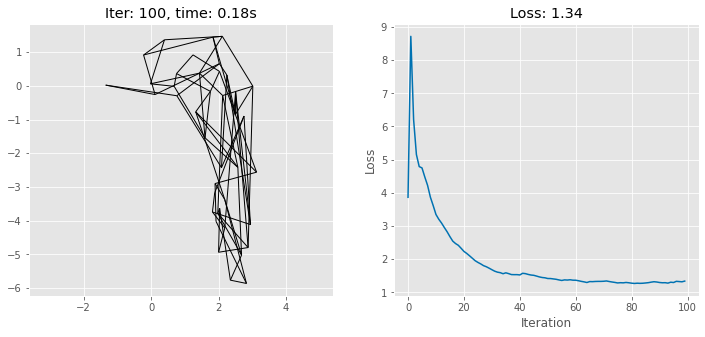

{'crossings', 'crossing_angle_maximization'}



{'stress': 0.838356224583558, 'edge_uniformity': 4.03337287902832, 'neighborhood_preservation': 0.8347826153039932, 'crossings': 68, 'crossing_angle_maximization': 0.8782639725395915, 'aspect_ratio': 0.4981532692909241, 'angular_resolution': 0.9878932619467378, 'vertex_resolution': 0.8455804032482706, 'gabriel': 0.9817281384021044}


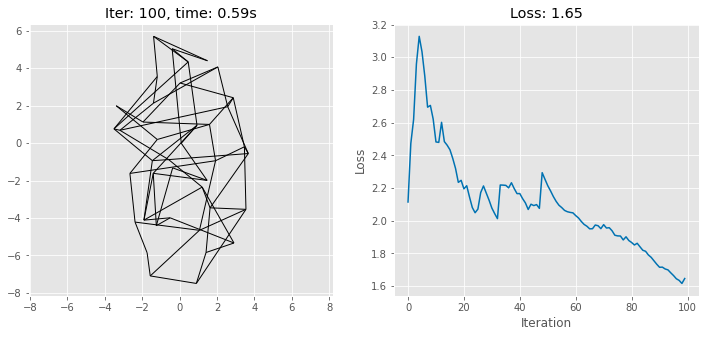

{'crossings', 'aspect_ratio'}



{'stress': 1.5449131518016264, 'edge_uniformity': 9.65503978729248, 'neighborhood_preservation': 0.8448275923728943, 'crossings': 119, 'crossing_angle_maximization': 0.9366661880567027, 'aspect_ratio': 0.13889259099960327, 'angular_resolution': 0.9980700542218983, 'vertex_resolution': 0.9734464547411962, 'gabriel': 0.9636416435241699}


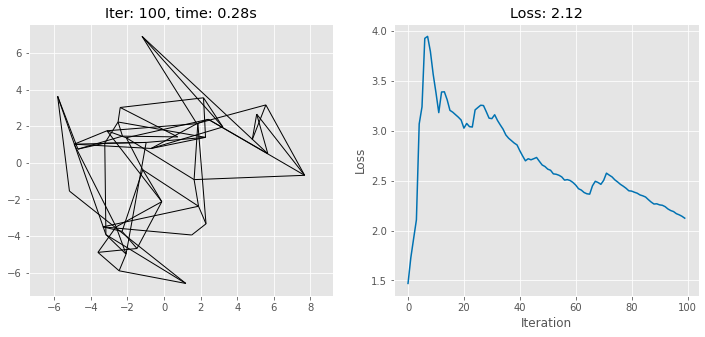

{'crossings', 'angular_resolution'}



{'stress': 0.3265673573027314, 'edge_uniformity': 1.4389777183532715, 'neighborhood_preservation': 0.8193832635879517, 'crossings': 78, 'crossing_angle_maximization': 0.9856584519542871, 'aspect_ratio': 0.39571017026901245, 'angular_resolution': 0.974107513204217, 'vertex_resolution': 0.899724912472154, 'gabriel': 0.9222269654273987}


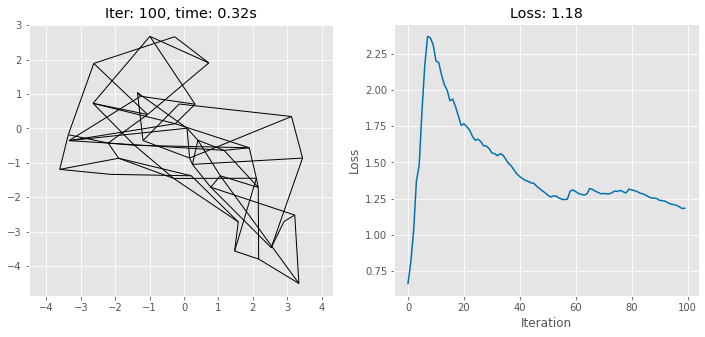

{'crossings', 'vertex_resolution'}



{'stress': 0.3524655640613339, 'edge_uniformity': 1.0084646940231323, 'neighborhood_preservation': 0.792792797088623, 'crossings': 67, 'crossing_angle_maximization': 0.9065051351557972, 'aspect_ratio': 0.4794737696647644, 'angular_resolution': 0.9572640396654606, 'vertex_resolution': 0.9404662732871263, 'gabriel': 0.9490299448370934}


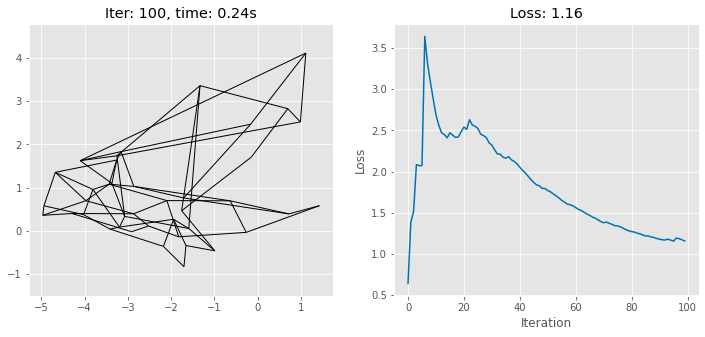

{'crossings', 'gabriel'}



{'stress': 0.30102500968431883, 'edge_uniformity': 0.4030649960041046, 'neighborhood_preservation': 0.7534883767366409, 'crossings': 59, 'crossing_angle_maximization': 0.906285506628486, 'aspect_ratio': 0.4743509888648987, 'angular_resolution': 0.9908365430310369, 'vertex_resolution': 0.8461103490828488, 'gabriel': 0.9859695788472891}


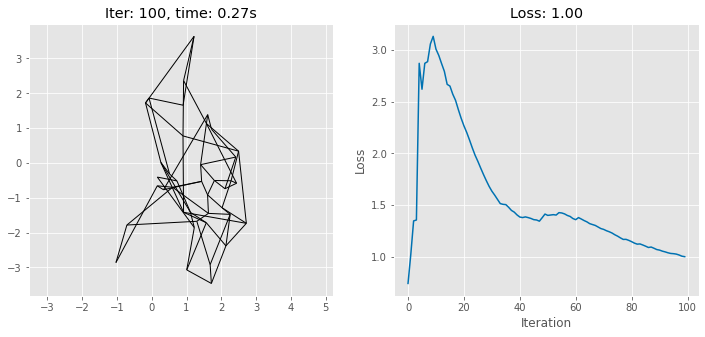

{'crossing_angle_maximization'}



{'stress': 0.8441756131000347, 'edge_uniformity': 6.370018482208252, 'neighborhood_preservation': 0.996254681609571, 'crossings': 585, 'crossing_angle_maximization': 0.9601338073529772, 'aspect_ratio': 0.11596852540969849, 'angular_resolution': 0.9909553118050098, 'vertex_resolution': 0.8768091983151673, 'gabriel': 0.986412450671196}


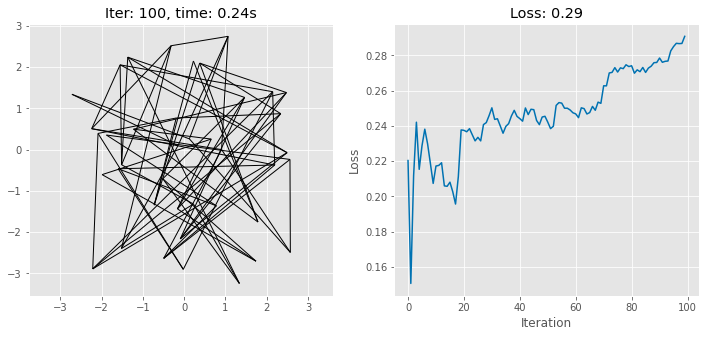

{'aspect_ratio', 'crossing_angle_maximization'}



{'stress': 3.0919607399373064, 'edge_uniformity': 24.747098922729492, 'neighborhood_preservation': 0.9692307692021132, 'crossings': 481, 'crossing_angle_maximization': 0.9259820267020148, 'aspect_ratio': 0.09006941318511963, 'angular_resolution': 0.9860762041062117, 'vertex_resolution': 0.7924848637812201, 'gabriel': 0.9870872180908918}


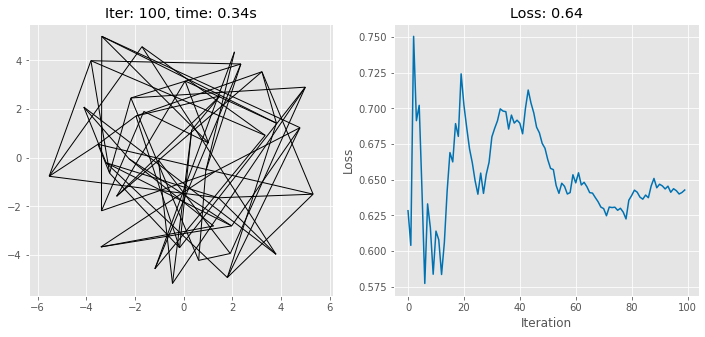

{'angular_resolution', 'crossing_angle_maximization'}



{'stress': 0.8037107724045447, 'edge_uniformity': 5.847823619842529, 'neighborhood_preservation': 0.9809885937720537, 'crossings': 462, 'crossing_angle_maximization': 0.955101248081521, 'aspect_ratio': 0.18166077136993408, 'angular_resolution': 0.9938825410790741, 'vertex_resolution': 0.9781950637178705, 'gabriel': 0.965497262775898}


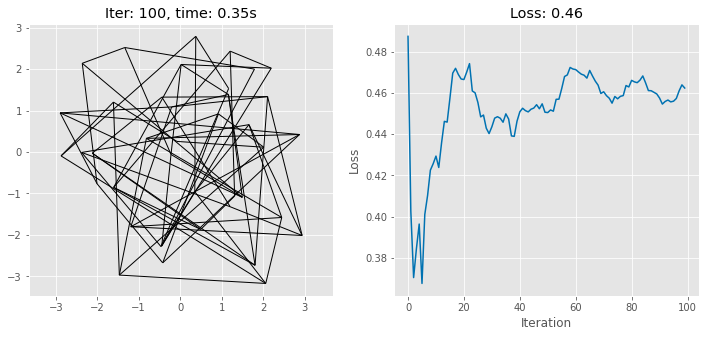

{'crossing_angle_maximization', 'vertex_resolution'}



{'stress': 1.0041681562382794, 'edge_uniformity': 8.464751243591309, 'neighborhood_preservation': 0.9848484843969345, 'crossings': 737, 'crossing_angle_maximization': 0.9408981732664425, 'aspect_ratio': 0.15622395277023315, 'angular_resolution': 0.9953569276258349, 'vertex_resolution': 0.8596544138549727, 'gabriel': 0.9601048715412617}


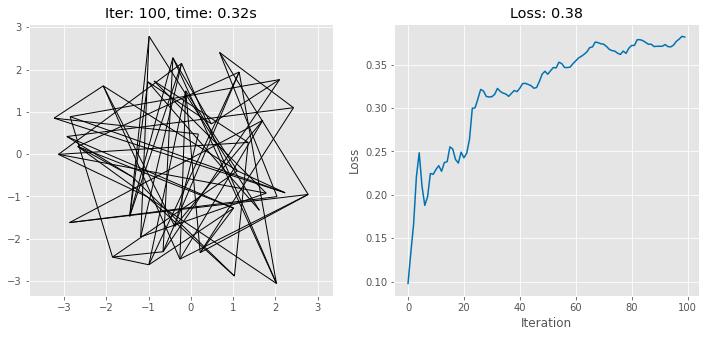

{'crossing_angle_maximization', 'gabriel'}



{'stress': 0.503346076356951, 'edge_uniformity': 2.5647165775299072, 'neighborhood_preservation': 0.9731800761073828, 'crossings': 446, 'crossing_angle_maximization': 0.9725646757514095, 'aspect_ratio': 0.15414273738861084, 'angular_resolution': 0.9926993628032506, 'vertex_resolution': 0.8859333047272047, 'gabriel': 0.9417335577309132}


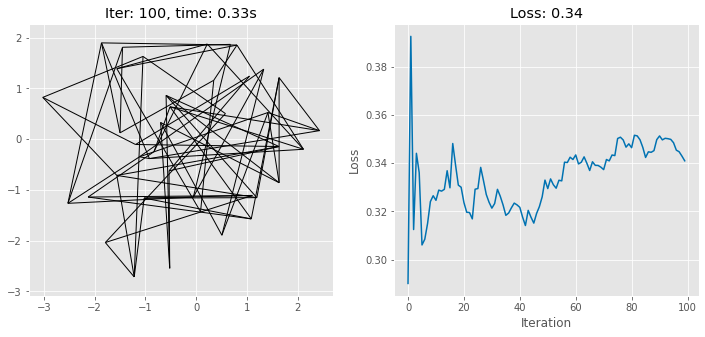

{'aspect_ratio'}



{'stress': 2.523266275127403, 'edge_uniformity': 19.77411651611328, 'neighborhood_preservation': 0.953125, 'crossings': 425, 'crossing_angle_maximization': 0.9743659484175234, 'aspect_ratio': 0.15829521417617798, 'angular_resolution': 0.996222905581817, 'vertex_resolution': 0.924549511550322, 'gabriel': 0.9545659683644772}


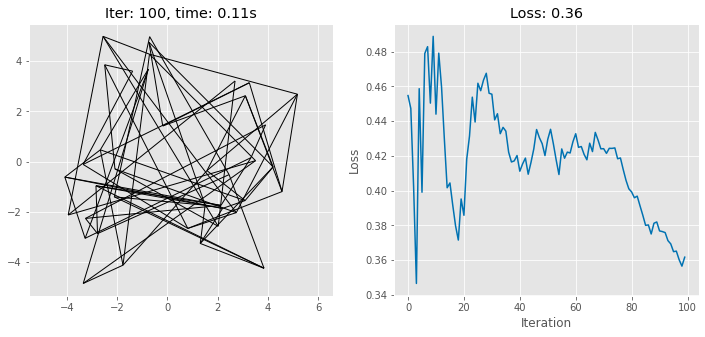

{'aspect_ratio', 'angular_resolution'}



{'stress': 2.616499446385191, 'edge_uniformity': 19.309375762939453, 'neighborhood_preservation': 0.9652509652078152, 'crossings': 429, 'crossing_angle_maximization': 0.9680486305631879, 'aspect_ratio': 0.09228533506393433, 'angular_resolution': 0.9889949718490243, 'vertex_resolution': 0.8589546936012924, 'gabriel': 0.9777933340519667}


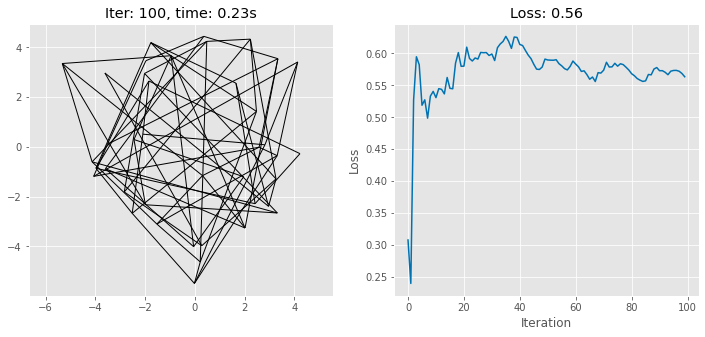

{'aspect_ratio', 'vertex_resolution'}



{'stress': 3.108494254236267, 'edge_uniformity': 24.98438835144043, 'neighborhood_preservation': 0.9448818899691105, 'crossings': 488, 'crossing_angle_maximization': 0.9808460524470777, 'aspect_ratio': 0.36005324125289917, 'angular_resolution': 0.9968875588383526, 'vertex_resolution': 0.9006029384244434, 'gabriel': 0.9491749964654446}


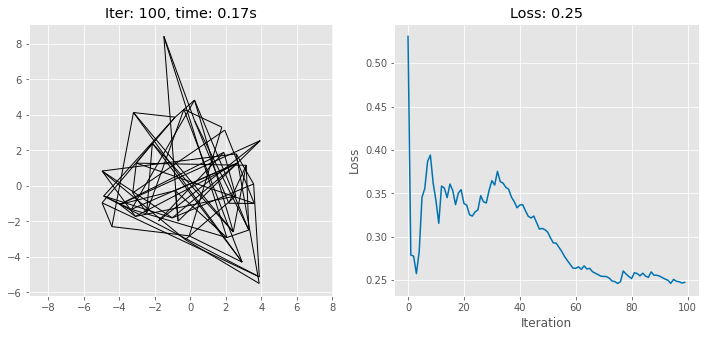

{'aspect_ratio', 'gabriel'}



{'stress': 1.218532964779301, 'edge_uniformity': 8.749419212341309, 'neighborhood_preservation': 0.9193548411130905, 'crossings': 268, 'crossing_angle_maximization': 0.9733909009680087, 'aspect_ratio': 0.265028178691864, 'angular_resolution': 0.9957804610021412, 'vertex_resolution': 0.9363051992990485, 'gabriel': 0.9434854350984097}


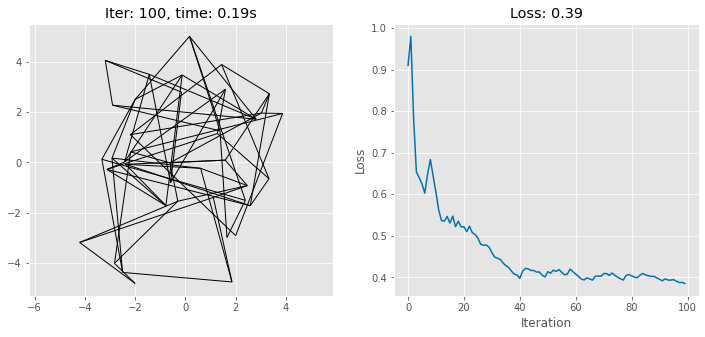

{'angular_resolution'}



{'stress': 0.43603877129227064, 'edge_uniformity': 1.4459037780761719, 'neighborhood_preservation': 0.9407114610075951, 'crossings': 294, 'crossing_angle_maximization': 0.9661690383945911, 'aspect_ratio': 0.15718179941177368, 'angular_resolution': 0.9996095645765308, 'vertex_resolution': 0.9016702418241741, 'gabriel': 0.9943631417118013}


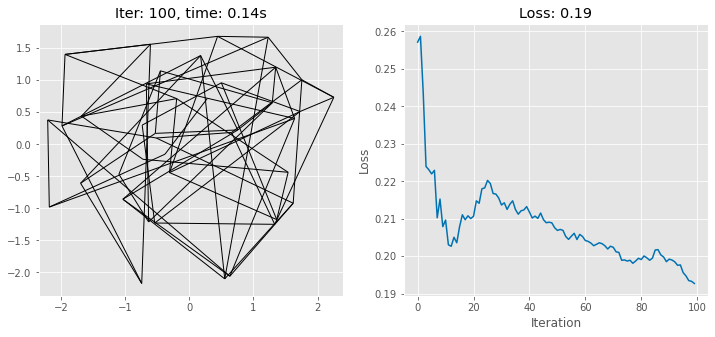

{'angular_resolution', 'vertex_resolution'}



{'stress': 0.4685754036114267, 'edge_uniformity': 1.7742345333099365, 'neighborhood_preservation': 0.9448818899691105, 'crossings': 406, 'crossing_angle_maximization': 0.9459249648225996, 'aspect_ratio': 0.2149810791015625, 'angular_resolution': 0.9992091589956544, 'vertex_resolution': 0.9137213053155041, 'gabriel': 0.9716243799775839}


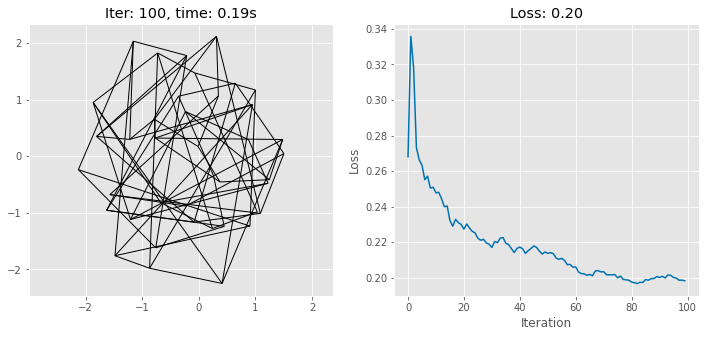

{'angular_resolution', 'gabriel'}



{'stress': 0.378951732507218, 'edge_uniformity': 0.4263432025909424, 'neighborhood_preservation': 0.9571984447538853, 'crossings': 245, 'crossing_angle_maximization': 0.9445165039247522, 'aspect_ratio': 0.17101746797561646, 'angular_resolution': 0.9530791826546192, 'vertex_resolution': 0.9125501279713217, 'gabriel': 0.9580379351973534}


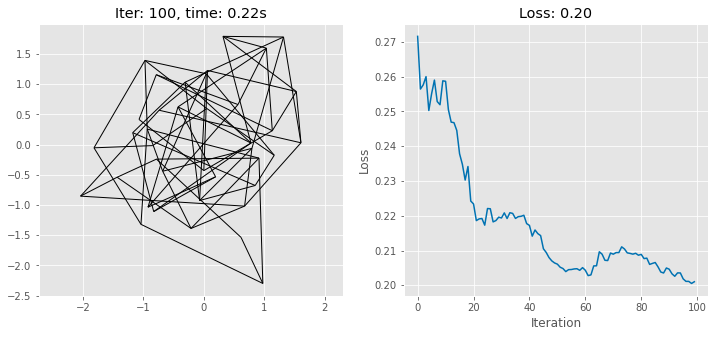

{'vertex_resolution'}



{'stress': 0.5521370392819746, 'edge_uniformity': 2.975095510482788, 'neighborhood_preservation': 0.9692307692021132, 'crossings': 543, 'crossing_angle_maximization': 0.9785537650706306, 'aspect_ratio': 0.32480567693710327, 'angular_resolution': 0.998975737253204, 'vertex_resolution': 0.8326507248161875, 'gabriel': 0.9487840794026852}


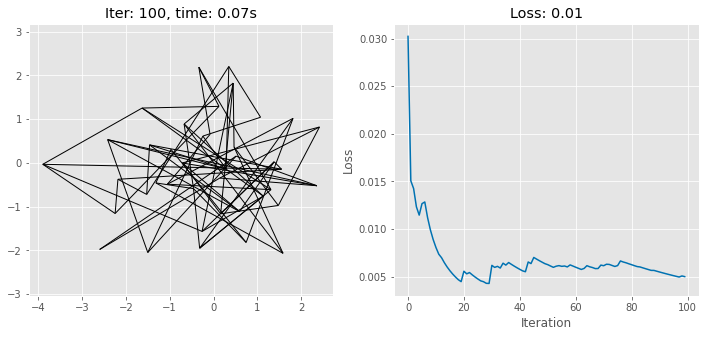

{'vertex_resolution', 'gabriel'}



{'stress': 0.4238636164621499, 'edge_uniformity': 0.3266249895095825, 'neighborhood_preservation': 0.9490196071565151, 'crossings': 373, 'crossing_angle_maximization': 0.9554021558599554, 'aspect_ratio': 0.17085880041122437, 'angular_resolution': 0.9985300295520574, 'vertex_resolution': 0.9117459001294916, 'gabriel': 0.9458611197769642}


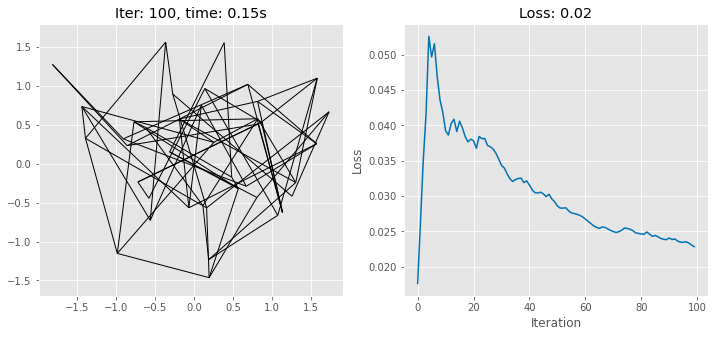

{'gabriel'}



{'stress': 0.4528303124581649, 'edge_uniformity': 0.1267559677362442, 'neighborhood_preservation': 0.9886792451143265, 'crossings': 304, 'crossing_angle_maximization': 0.9779133209994557, 'aspect_ratio': 0.26728129386901855, 'angular_resolution': 0.9883146854117513, 'vertex_resolution': 0.9179140021780144, 'gabriel': 0.9528164640069008}


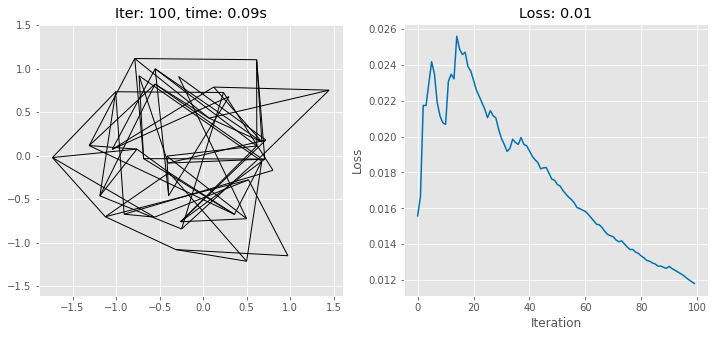


CPU times: user 1min 1s, sys: 3.42 s, total: 1min 4s
Wall time: 27.8 s


In [27]:
%%time


import importlib
importlib.reload(C)
importlib.reload(Q)
importlib.reload(utils)
importlib.reload(vis)
import gd2
importlib.reload(gd2)
from gd2 import GD2









criteria_weights = dict(
    stress=1,
    edge_uniformity=0.5,
    neighborhood_preservation=0.5,
    crossings=1,
    crossing_angle_maximization=0.1,
    aspect_ratio=10,
    angular_resolution=0.1,
    vertex_resolution=0.05,
    gabriel=0.5,
)

sample_sizes = dict(
    stress=64,
    edge_uniformity=int(len(G)**0.5),
    neighborhood_preservation=16,
    crossings=16,
    crossing_angle_maximization=10,
    aspect_ratio=int(len(G)**0.5),
    angular_resolution=32,
    vertex_resolution=int(len(G)**0.5),
#     vertex_resolution=len(G),
    gabriel=10,
)




## choose criteria
criteria_all = [
    'stress',
    'edge_uniformity',
    'neighborhood_preservation',
    'crossings',
    'crossing_angle_maximization',
    'aspect_ratio',
    'angular_resolution',
    'vertex_resolution',
    'gabriel',
]

criteria_pairs = [
    (ci, cj) for (i,ci), (j, cj) 
    in list(
        itertools.product(
            enumerate(criteria_all), 
            enumerate(criteria_all)
        ))
    if i<=j
]


for c1, c2 in tqdm(criteria_pairs):
    criteria_pair = {c1,c2}
    print(criteria_pair)

    gd = GD2(G)

    result = gd.optimize(
        criteria_weights={c:criteria_weights[c] for c in criteria_pair}, 
        sample_sizes=sample_sizes,
        evaluate=criteria_all,

        max_iter=100, 
        evaluate_interval=10000//40,
        vis_interval=-10000//10,
#             clear_output=True,

        optimizer_kwargs = dict(lr=2),
        scheduler_kwargs = dict(verbose=False),
    )
    print(result['qualities'])

    pos = gd.pos.detach().numpy()
    pos_G = {k:pos[gd.k2i[k]] for k in gd.G.nodes}
    vis.plot(
        gd.G, pos_G,
        gd.loss_curve, 
        result['iter'], result['runtime'],
        edge=True, show=True, save=False
    )



    ## store data
    if c1 == c2:
        fn = c1
    else:
        fn = f'{c1}-vs-{c2}'
    gd.save(f'{dir_out}/{fn}.pkl')




## plot examples in a matrix

In [12]:
import importlib
importlib.reload(C)
importlib.reload(Q)
importlib.reload(utils)
importlib.reload(vis)
import gd2
importlib.reload(gd2)
from gd2 import GD2

In [13]:
from matplotlib.gridspec import GridSpec

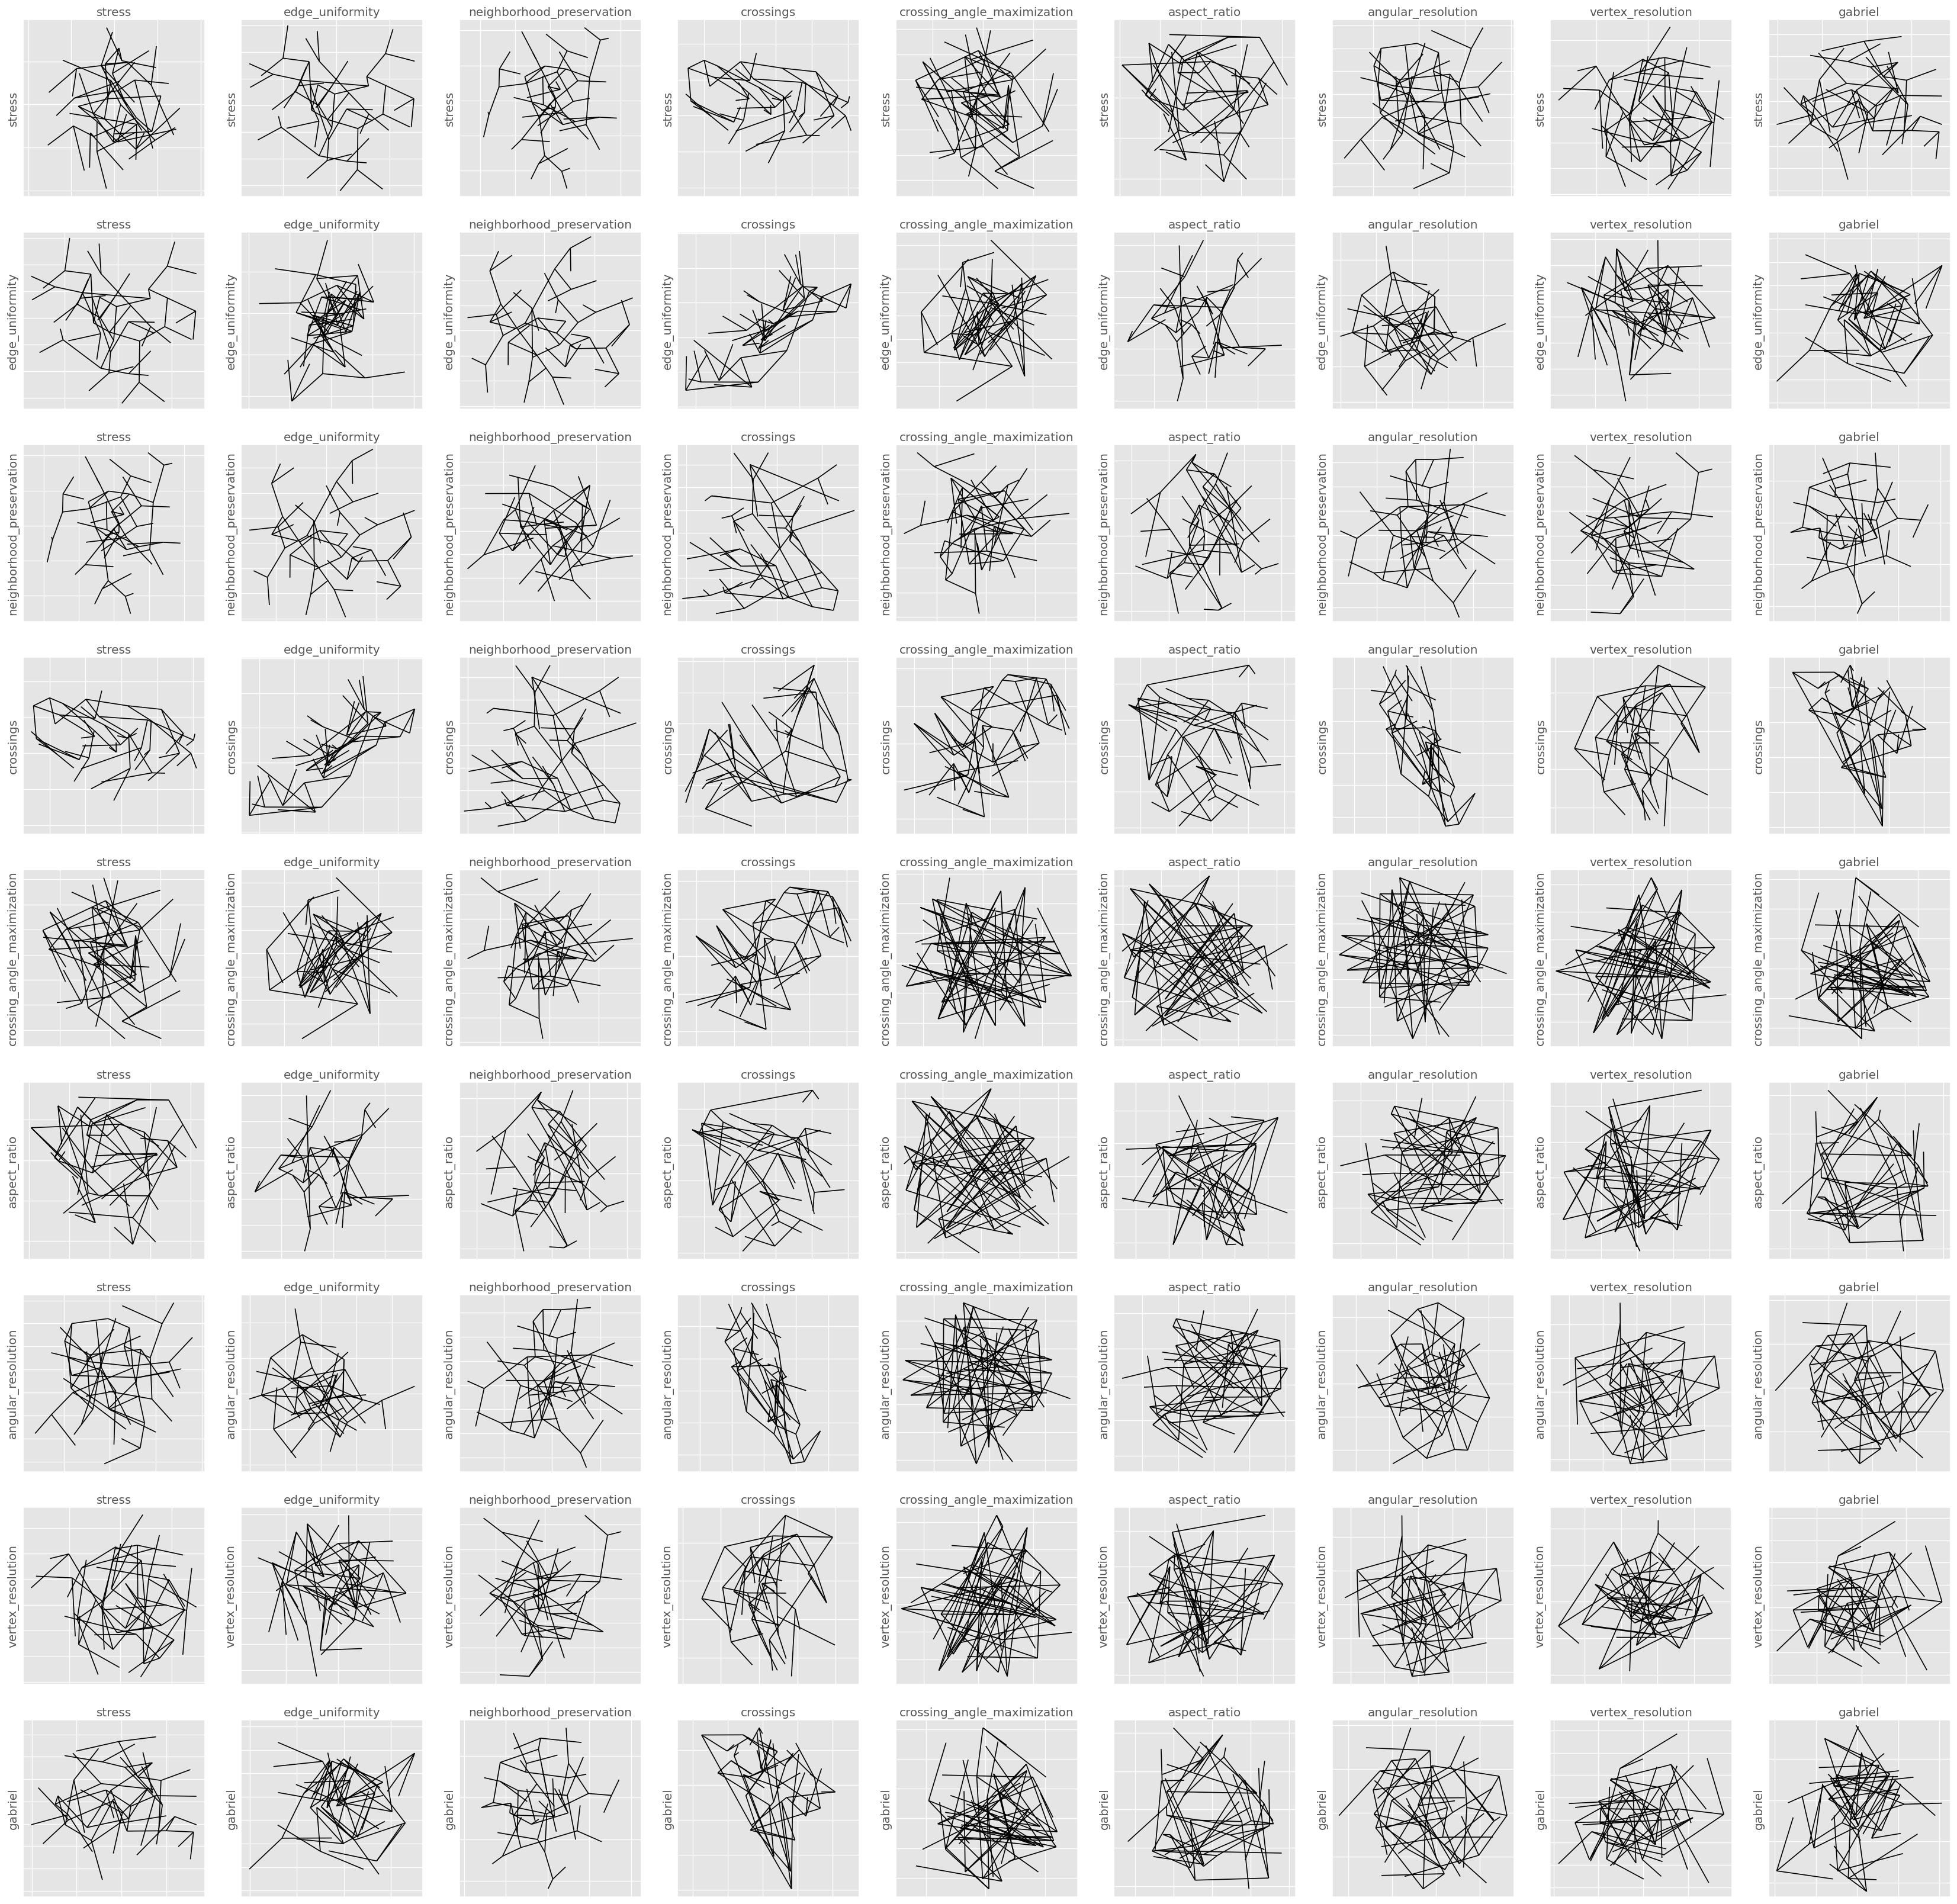

In [28]:
# dir_in = './analysis/criteria_pairs/tree_2_6-0'
# dir_in = './analysis/criteria_pairs/tree_2_5-t1633627830'
# dir_in = './analysis/criteria_pairs/tree_2_5-t1633999851'

dir_in_left = './analysis/criteria_pairs/tree_2_5-t1634182253'
dir_in_upper = './analysis/criteria_pairs/grid_5_8-t1634182400'

criteria_all = [
    'stress',
    'edge_uniformity',
    'neighborhood_preservation',
    'crossings',
    'crossing_angle_maximization',
    'aspect_ratio',
    'angular_resolution',
    'vertex_resolution',
    'gabriel',
]
n = len(criteria_all)


# mode = 'criteria_pairs'
mode = 'drawings'
# mode = 'learning_curves'


dpi = 120
if mode == 'drawings':
    space = 0.2
    figsize = [35,35]
else:
    space = 0.3
    figsize = [40,40]
    
fig = plt.figure(figsize=figsize, dpi=dpi)
gs = GridSpec(n,n, wspace=space, hspace=space)

criteria_pairs = list(itertools.product(enumerate(criteria_all), enumerate(criteria_all)))

for (i,c1), (j,c2) in tqdm(criteria_pairs):
    
        if c1 == c2:
            fn = c1
        elif i<j:
            fn = f'{c1}-vs-{c2}'
        elif i>j:
            fn = f'{c2}-vs-{c1}'
            
        with open(f'{dir_in}/{fn}.pkl', 'rb') as f:
            data = pkl.load(f)
#             ax = plt.subplot(gs[(n-1)-i,j])
            ax = plt.subplot(gs[i,j])
            
            if mode == 'drawings':
                ## draw graphs
                pos = data['pos'].detach().numpy()
                pos_G = {k:pos[data['k2i'][k]] for k in data['G'].nodes}
                vis.draw_graph(
                    data['G'], pos_G, ax=ax,
                    ylabel=c1,# if j==0 else '',
                    xlabel=c2,# if i==0 else '',
                )
                ax.xaxis.set_label_position('top')
                plt.axis('equal')
                ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
            
            
            elif mode == 'criteria_pairs':
                ## plot learn curves
                t = [r['time'] for r in data['qualities_by_time']]
                quality_curve_x = [r['qualities'][c2] for r in data['qualities_by_time']]
                quality_curve_y = [r['qualities'][c1] for r in data['qualities_by_time']]
                plt.scatter(quality_curve_x, quality_curve_y, s=50, c=t)
                plt.xlabel(c2)
                plt.ylabel(c1)
                
                
            elif mode == 'learning_curves':
                ## plot quality curves       
                t = [r['time'] for r in data['qualities_by_time']]
                for c in criteria_all:
                    quality_curve = np.array([r['qualities'][c] for r in data['qualities_by_time']])
                    if c in {'stress', 'crossings', 'edge_uniformity'}:
                        quality_curve = quality_curve/quality_curve.max()
                        
                    if c == c1:
                        color, alpha, style = 'C0', 1.0, '-'
                    elif c == c2:
                        color, alpha, style = 'C1', 1.0, '-'
                    else:
                        color, alpha, style = '#aaa', 1.0, '-'
                    plt.plot(
                        t, quality_curve, 
                        style, 
                        label=c if c==c1 or c==c2 else None,
                        lw=2 if c==c1 or c==c2 else 0.5,
                        color=color,
                        alpha=alpha
                    )
                plt.xlabel('Time')
                plt.ylabel('Quality')
#                 plt.title(f'{c1} vs. {c2}')
                plt.legend()
                plt.ylim([-0.1, 1.5])

t = dir_in.split('-')[-1]
plt.savefig(f'{mode}-matrix-{t}.png', bbox_inches='tight', dpi=dpi)
plt.show()
            


## testing reyans hyper cubes

In [ ]:
import json
log_dir = 'reyan/log_folder/'
problematic_files = ['input_11.txt', 'input_18.txt', 'input_26.txt', 'input_27.txt', 'input_28.txt', 'input_48.txt', 'input_56.txt', 'input_63.txt', 'input_70.txt', 'input_71.txt', 'input_73.txt', 'input_74.txt', 'input_75.txt', 'input_76.txt', 'input_93.txt', 'input_94.txt', 'input_95.txt', 'input_101.txt', 'input_102.txt', 'input_103.txt', 'input_108.txt', 'input_109.txt', 'input_110.txt', 'input_115.txt', 'input_116.txt', 'input_117.txt', 'input_118.txt', 'input_120.txt', 'input_121.txt', 'input_122.txt', 'input_123.txt', 'input_124.txt', 'input_125.txt', 'input_126.txt', 'input_127.txt', 'input_128.txt', 'input_129.txt', 'input_134.txt', 'input_137.txt', 'input_138.txt', 'input_139.txt', 'input_140.txt', 'input_146.txt', 'input_147.txt', 'input_148.txt', 'input_153.txt', 'input_154.txt', 'input_155.txt', 'input_157.txt', 'input_160.txt', 'input_161.txt', 'input_162.txt', 'input_163.txt', 'input_164.txt', 'input_166.txt', 'input_167.txt', 'input_168.txt', 'input_169.txt', 'input_170.txt', 'input_171.txt', 'input_172.txt', 'input_173.txt', 'input_174.txt', 'input_179.txt', 'input_183.txt', 'input_184.txt', 'input_185.txt', 'input_191.txt', 'input_192.txt', 'input_193.txt', 'input_198.txt', 'input_199.txt', 'input_200.txt', 'input_202.txt', 'input_205.txt', 'input_206.txt', 'input_208.txt', 'input_209.txt', 'input_211.txt', 'input_212.txt', 'input_213.txt', 'input_214.txt', 'input_215.txt', 'input_216.txt', 'input_217.txt', 'input_218.txt', 'input_219.txt', 'input_224.txt']
pairs = []
for fn in problematic_files:
    with open(log_dir+fn) as f:
        params = json.load(f)
        graph_str = f'{params["graph"]} {params["graph_param_1"]}'
        pairs.append(
            (tuple(sorted(params['metrics'])),)
            +(graph_str,fn.split('/')[-1].split('.')[0])
        )
        
# for criteria, graph, fn in natsorted(pairs, key=lambda x:x[-1]):
for criteria, graph, fn in natsorted(pairs, key=lambda x:x):
    print(f'{graph}\t{fn:<12} {criteria} ')

In [ ]:
from pathlib import Path

In [ ]:
log_dir = 'log_folder/'
problematic_files = ['input_11.txt', 'input_18.txt', 'input_26.txt', 'input_27.txt', 'input_28.txt', 'input_48.txt', 'input_56.txt', 'input_63.txt', 'input_70.txt', 'input_71.txt', 'input_73.txt', 'input_74.txt', 'input_75.txt', 'input_76.txt', 'input_93.txt', 'input_94.txt', 'input_95.txt', 'input_101.txt', 'input_102.txt', 'input_103.txt', 'input_108.txt', 'input_109.txt', 'input_110.txt', 'input_115.txt', 'input_116.txt', 'input_117.txt', 'input_118.txt', 'input_120.txt', 'input_121.txt', 'input_122.txt', 'input_123.txt', 'input_124.txt', 'input_125.txt', 'input_126.txt', 'input_127.txt', 'input_128.txt', 'input_129.txt', 'input_134.txt', 'input_137.txt', 'input_138.txt', 'input_139.txt', 'input_140.txt', 'input_146.txt', 'input_147.txt', 'input_148.txt', 'input_153.txt', 'input_154.txt', 'input_155.txt', 'input_157.txt', 'input_160.txt', 'input_161.txt', 'input_162.txt', 'input_163.txt', 'input_164.txt', 'input_166.txt', 'input_167.txt', 'input_168.txt', 'input_169.txt', 'input_170.txt', 'input_171.txt', 'input_172.txt', 'input_173.txt', 'input_174.txt', 'input_179.txt', 'input_183.txt', 'input_184.txt', 'input_185.txt', 'input_191.txt', 'input_192.txt', 'input_193.txt', 'input_198.txt', 'input_199.txt', 'input_200.txt', 'input_202.txt', 'input_205.txt', 'input_206.txt', 'input_208.txt', 'input_209.txt', 'input_211.txt', 'input_212.txt', 'input_213.txt', 'input_214.txt', 'input_215.txt', 'input_216.txt', 'input_217.txt', 'input_218.txt', 'input_219.txt', 'input_224.txt']

for fn in problematic_files:
        
    with open(log_dir+fn) as json_file:
        input_param = json.load(json_file)
    
    graph_str = (
        input_param['graph']
        + ' ' 
        + ' '.join(input_param[k] for k in natsorted(input_param) if k.startswith('graph_param_'))
    )
    metrics = input_param['metrics']
    print(f'='*40)
    print(f'fn: {fn}')
    print(f'metrics: {metrics}')
    print(f'graph: {graph_str}')
    
    if Path(input_param["output_file"]).exists():
        continue
          
    print('generating graph', end=' ')
    if input_param["graph"]=="tree":
        G = nx.balanced_tree(int(input_param["graph_param_1"]), int(input_param["graph_param_2"]))
    elif input_param["graph"]=="hypercube":
        G = nx.hypercube_graph(int(input_param["graph_param_1"]))
    elif input_param["graph"]=="grid":
        dim = int(input_param["graph_param_1"])
        G = nx.grid_graph(dim = [dim, dim])
    print(f'of {len(G)} nodes')
    
    max_iter = 10000
    criteria_weights_default = {
        'stress': 4,
        'edge_uniformity':1,
        'neighborhood_preservation':0.5,
        'crossings':1,
        'crossing_angle_maximization':0.1,
        'aspect_ratio':10,
        'angular_resolution':0.1,
        'vertex_resolution':1,
        'gabriel':0.01,
    }

    sample_sizes_default = {
        'stress': 64,
        'edge_uniformity': 10,
        'neighborhood_preservation': 16,
        'crossings': 10,
        'crossing_angle_maximization':10,
        'aspect_ratio': 'full',
        'angular_resolution': 10,
        'vertex_resolution': int(len(G)**0.5),
        'gabriel': 10,
    }


    criteria_weights = {}
    for m in input_param['metrics']:
        criteria_weights[m] = criteria_weights_default[m]


    gd = GD2(G)
    result = gd.optimize(
        criteria_weights=criteria_weights,
        sample_sizes=sample_sizes_default,

        evaluate='all',
    #     evaluate={'neighborhood_preservation'},
#         evaluate=set(input_param['metrics']),

        max_iter=max_iter, 
        evaluate_interval=-1,
        vis_interval=-1,

        optimizer_kwargs = dict(lr=1),
        scheduler_kwargs = dict(verbose=False),
    )


    for q,v in result['qualities'].items():
        print(q,v)

    return_dict = dict(
        metric_value=result['qualities'],
        pos=result['pos'].detach().cpu().tolist(),
        time=result['runtime']
    )
    
    with open(input_param["output_file"], 'w') as fp:
        json.dump(return_dict, fp)
          
          
    ## vis for debugging
    pos = gd.pos.detach().numpy()
    pos_G = {k:pos[gd.k2i[k]] for k in gd.G.nodes}
    vis.plot(
        gd.G, pos_G,
        gd.loss_curve, 
        result['iter'], result['runtime'],
        edge=True, show=True, save=False
    )

    

In [ ]:

# from utils import lovasz_losses as L
# a = torch.eye(5)
# pred = torch.randn(5,5)
# L.lovasz_softmax(pred, a)

## Analysis of sample size

In [ ]:
# import importlib
# importlib.reload(C)
# importlib.reload(Q)
# importlib.reload(utils)
# importlib.reload(vis)
# importlib.reload(gd2)

In [ ]:
import pandas as pd
import itertools

In [ ]:
df

In [ ]:
# cm = plt.cm.viridis()

# for result in results:
    
#     sample_size = result['sample_sizes']['stress']
    
#     t = [x['time'] for x in result['qualities_by_time']]
#     stress = [x['qualities']['stress'] for x in result['qualities_by_time']]
    
#     plt.plot(t, stress, '.-', label=f'sample_size = {sample_size}', color=cm(np.log2(sample_size)/np.log2(512)))
    
# plt.xlabel('Total Time (sec)')
# plt.ylabel('Stress')
# plt.yscale('log')

# plt.xlim([-10,100])
# plt.legend()
# plt.savefig('time-vs-stress-curve-by-sample-size-100sec.png')
# plt.show()

In [ ]:
# df.to_csv('./analysis/balanced-tree-2-8.csv')

In [ ]:
df.plot('sample_size', 'runtime', style='o')
df.plot('sample_size', 'stress', style='o');

In [ ]:
plt.scatter(
    df['runtime'], 
    df['stress'], 
    s=df['sample_size']+10, 
    linewidth=1,
    edgecolor='#eee',
    alpha=0.8,
#     c=df['sample_size']+10,
    label='Sample Size',
)

# plt.xscale('symlog')
plt.xlabel('Runtime')
plt.xlim([0, plt.xlim()[1]*1.1])

# plt.yscale('log')
plt.ylabel('Stress')
plt.ylim([0, plt.ylim()[1]*1.1])

plt.savefig('figures-tmp/runtime-vs-stress-by-sample_rate.png')

## Dev

In [ ]:
%%time


import importlib
importlib.reload(C)
importlib.reload(Q)
importlib.reload(utils)
importlib.reload(vis)


runtime = []

niter = int(1e6)

shouldVis = True
visIter = 5000

shouldSnap = True
snapIter = 5

gClamp = 4
minLR = 1e-5
maxSampleSize = 64


totalTime = 0

print('generating graph', end=' ')
# G = nx.grid_2d_graph(18,36)
# G = nx.hypercube_graph(3)
# G = nx.balanced_tree(2,4)
G = utils.load_spx_teaser()
# G = nx.karate_club_graph()


# graph_name = 'grid1'
# graph_name = 'grid1_dual'
# graph_name = 'odepa400'
# graph_name = 'netz4504_dual'
# graph_name = 'L'
# -----
# graph_name = 'netz4504'
# graph_name = 'qh882'
# mat_dir = 'graphs/SuiteSparse Matrix Collection'
# G = utils.load_mat(f'{mat_dir}/{graph_name}.mat')


# G = nx.Graph()
# G.add_nodes_from([0,1,2,3])
# G.add_edges_from([(0,1),(2,3)])




print(f'of {len(G)} nodes')
maxDegree = max(dict(G.degree).values())
print('Calculating all pairs shortest path', end='...')
t0 = time.time()

# D, k2i = utils.dict2tensor(dict(nx.all_pairs_shortest_path_length(G)))
# adj,_ = utils.dict2tensor(dict(G.adjacency()), fill=1, device=device)
D, adj_sparse, k2i = utils.shortest_path(G)
adj = torch.from_numpy(adj_sparse.toarray())
D = torch.from_numpy(D)

i2k = {i:k for k,i in k2i.items()}
edge_indices = [(k2i[e0], k2i[e1]) for e0,e1 in G.edges]
node_indices = range(len(G))
node_index_pairs = np.c_[
    np.repeat(node_indices, len(G)),
    np.tile(node_indices, len(G))
]
node_index_pairs_start = 0
np.random.shuffle(node_index_pairs)


    
dt = time.time() - t0
totalTime += dt

W = 1/(D**2+1e-6)
truth = adj + torch.eye(adj.shape[0], device=device)
print('done')


##training
#     pos = torch.rand(len(G.nodes), 2, device=device)*2-1
pos = torch.randn(len(G.nodes), 2, device=device)
pos.requires_grad_(True)


##LOAD prev layout
# G_ = nx.read_gpickle(glob(f'layouts/balanced_tree_{2}_{7}-stress-*.gpickle')[0])
# pos = {k2i[k]: G_.nodes[k]['pos'] for k in G_.nodes}
# pos = torch.stack([torch.from_numpy(pos[i]) for i in range(len(pos))])
# pos = pos.requires_grad_(True)


optimizer = optim.SGD([pos], lr=0.1, momentum=0.7, nesterov=True)
# optimizer = optim.RMSprop([pos], lr=0.01)
# optimizer = optim.Adam([pos], lr=0.001)


# scheduler = None
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.9, patience=np.ceil(np.log2(len(G)+1))*100, 
    min_lr=minLR, verbose=True
)
# scheduler = optim.lr_scheduler.LambdaLR(
#     optimizer, 
#     lr_lambda=lambda e:1*(1-e/niter)
# )


iterBar = tqdm(range(niter))
lossCurve = []
sampleSize = min(len(G), maxSampleSize)
degrees = adj.sum(1).numpy().astype(np.int64)
xPath = []

qualityMeasureInterval = max(1, niter // 30)
qualityMeasureCurves = defaultdict(list)
activeQualityMeasures = [
    'stress',
#     'edge_uniformity',
#     'neighborhood_preservation',
#     'crossings',
    
#     'crossing_angle_maximization',
    'aspect_ratio',
#     'angular_resolution',
#     'vertex_resolution',
#     'gabriel',
    
]

for i in iterBar:
    t0 = time.time()
    
    ## optimization
    optimizer.zero_grad()

    if node_index_pairs_start >= len(node_index_pairs):
        np.random.shuffle(node_index_pairs)
        node_index_pairs_start = 0
    stress_samples = node_index_pairs[node_index_pairs_start:node_index_pairs_start+sampleSize]
    
    loss = (
        +C.stress(pos, D, W, samples=stress_samples)
#         +0.5*C.edge_uniformity(pos, G, k2i, sampleSize-1)
#         +0.1*C.angular_resolution(pos, G, k2i, sampleSize=sampleSize//maxDegree)
#         + 10*C.aspect_ratio(pos, sampleSize)
#         C.crossing_angle_maximization(pos, G, k2i, i2k, sampleSize=10, sampleOn='crossings') ## slow for large sample size
#     +0.001*C.vertex_resolution(pos, sampleSize, target=1/len(G)**0.5)
#     + 0.1*C.gabriel(pos, G, k2i, sampleSize=int(sampleSize**0.5))
#         +1*C.crossings(pos, G, k2i, reg_coef=0.01, niter=20, sampleSize=4, sampleOn='crossings')
#         +C.crossings(pos, G, k2i, reg_coef=0.01, niter=20, sampleSize=20, sampleOn='edges')
#         C.neighborhood_preseration(pos, G, adj, k2i, i2k, n_roots=2, depth_limit=2)
    )
    loss.backward()
    pos.grad.clamp_(-gClamp, gClamp)
    optimizer.step()
    
    node_index_pairs_start+=sampleSize
    
    ## debug info
    totalTime += time.time() - t0
    if loss.isnan():
        raise Exception('loss is nan')
    if pos.isnan().any():
        raise Exception('pos is nan')
    
    if i % int(niter/100) == int(niter/100)-1:
        iterBar.set_postfix({'loss': loss.item(), })    
    if len(lossCurve) > 0:
        lossCurve.append(0.9*lossCurve[-1] + 0.1*loss.item())
    else:
        lossCurve.append(loss.item())
    if shouldSnap and i % snapIter == 0:
        x = pos.detach().cpu().numpy()
        xPath.append(x.copy())    
    
    
    ## quality measures
    if i % qualityMeasureInterval == qualityMeasureInterval-1:
        if 'stress' in activeQualityMeasures:
            qualityMeasureCurves['stress'].append(
                Q.stress(pos, D, W, None)
            )
        if 'edge_uniformity' in activeQualityMeasures:
            qualityMeasureCurves['edge_uniformity'].append(
                Q.edge_uniformity(pos, G, k2i)
            )
        if 'neighborhood_preservation' in activeQualityMeasures:
            qualityMeasureCurves['neighborhood_preservation'].append(
                Q.neighborhood_preservation(pos, G, adj, i2k)
            )
        if 'crossings' in activeQualityMeasures:
            qualityMeasureCurves['crossings'].append(
                Q.crossings(pos, edge_indices)
            )
        if 'crossing_angle_maximization' in activeQualityMeasures:
            qualityMeasureCurves['crossing_angle_maximization'].append(
                Q.crossing_angle_maximization(pos, G.edges, k2i)
            )
        if 'aspect_ratio' in activeQualityMeasures:
            qualityMeasureCurves['aspect_ratio'].append(
                Q.aspect_ratio(pos)
            )
        if 'angular_resolution' in activeQualityMeasures:
            qualityMeasureCurves['angular_resolution'].append(
                Q.angular_resolution(pos, G, k2i)
            )
            
        if 'vertex_resolution' in activeQualityMeasures:
            qualityMeasureCurves['vertex_resolution'].append(
                Q.vertex_resolution(pos, target=1/len(G)**0.5)
            )
        if 'gabriel' in activeQualityMeasures:
            qualityMeasureCurves['gabriel'].append(
                Q.gabriel(pos, G, k2i)
            )
        

    ##vis
    if shouldVis and i % visIter == visIter-1:
        x = pos.detach().cpu().numpy()
        pos_i = {k: x[k2i[k], :2] for k in G.nodes}
        display.clear_output(wait=True)
        vis.plot(G, pos_i, lossCurve, [], i, totalTime, node_size=6, edge=True, show=True, save=False)
    
        
    
    if scheduler is not None:
#         scheduler.step(i)
        scheduler.step(lossCurve[-1])
    

    if optimizer.param_groups[0]['lr'] <= minLR:
#     or pos.grad.max() < 1e-3*(pos.max()-pos.min()):
        print('Done')
        break

In [ ]:
# show final result
x = pos.detach().cpu().numpy()
pos_i = {k: x[k2i[k], :2] for k in G.nodes}
vis.plot(G, pos_i, lossCurve, [], i, totalTime,  
         show=True, save=False, title=f'|V|={len(G)}, iter: {i}, time: {totalTime:.2f} sec')
totalTime

In [ ]:
for q in activeQualityMeasures:
    plt.figure(figsize=[6,3])
    plt.plot(qualityMeasureCurves[q],'.-')
    plt.ylabel(' '.join(s.capitalize() for s in q.split('_')))
    plt.title(' '.join(s.capitalize() for s in q.split('_')))
    plt.show()
    print(qualityMeasureCurves[q])

In [ ]:
1/len(G)**0.5

In [ ]:
# fig, ax = plt.subplots()

# nx.draw_networkx(G, pos_i, ax=ax)
# ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)


## Animation

In [ ]:
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML

# if type(xPath) == list:
#     xPath = np.stack(xPath)
    
# padding = 0.1

# fig, ax = plt.subplots()
# scatter = plt.scatter([0], [0], s=10)
# lc = mc.LineCollection([], linewidths=1)
# ax.add_collection(lc)

# xlim = [np.min(xPath[:,:,0]),np.max(xPath[:,:,0])]
# ylim = [np.min(xPath[:,:,1]),np.max(xPath[:,:,1])]
# xlim = [xlim[0]-padding*(xlim[1]-xlim[0]), xlim[1]+padding*(xlim[1]-xlim[0])]
# ylim = [ylim[0]-padding*(ylim[1]-ylim[0]), ylim[1]+padding*(ylim[1]-ylim[0])]
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
    
# def init():
#     return scatter,lc

# def update(frame):
#     xy = xPath[frame]
#     scatter.set_offsets(xy)
#     segs = [[xy[k2i[k0]], xy[k2i[k1]]] for k0,k1 in G.edges]           
#     lc.set_segments(segs)
#     return scatter,lc

# anim = FuncAnimation(
#     fig, 
#     update, 
#     frames=range(0,len(xPath),1),
#     init_func=init, 
#     interval=1000.0/20,
#     blit=True)

# HTML(anim.to_jshtml())

In [ ]:
# x = pos.detach().cpu().numpy()
# pos_i = {k: x[k2i[k], :2] for k in G.nodes}
# vis.plot(G, pos_i, lossHistory, [], i, totalTime, show=True, save=True)

## animation

In [ ]:
# # Create a gif from images in fig/
# # 
# frames = []
# imgs = natsorted(glob('fig/*.png'))

# for img in imgs:
#     new_frame = Image.open(img)
#     frames.append(new_frame)

# # Save into a GIF file that loops forever
# frames[0].save(f'anim-{int(time.time())}.gif', format='GIF',
#                append_images=frames[1:],
#                save_all=True,
#                duration=100, loop=0)